## 知識情報学第4回サンプルプログラム ex4.ipynb
- Programmed by Nattapong Thammasan, 監修　福井健一
- Last updated: 2021/11/02
- Checked with Python 3.9.7, scikit-learn 1.3
- MIT License

## ゴルフプレイデータのナイーブベイズ分類器による識別とROC,AUCによる評価
- データweather.nominal.arffは本プログラムと同じフォルダ内に置いておく

In [ ]:
%matplotlib inline
import numpy as np
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import roc_curve,roc_auc_score,auc
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB

### arffデータの読み込み

In [ ]:
f = open("weather.nominal.arff", "r", encoding="utf-8")
data, meta = arff.loadarff(f)
df_data= pd.DataFrame(data)
df_data

,outlook,temperature,humidity,windy,play
0,b'sunny',b'hot',b'high',b'FALSE',b'no'
1,b'sunny',b'hot',b'high',b'TRUE',b'no'
2,b'overcast',b'hot',b'high',b'FALSE',b'yes'
3,b'rainy',b'mild',b'high',b'FALSE',b'yes'
4,b'rainy',b'cool',b'normal',b'FALSE',b'yes'
5,b'rainy',b'cool',b'normal',b'TRUE',b'no'
6,b'overcast',b'cool',b'normal',b'TRUE',b'yes'
7,b'sunny',b'mild',b'high',b'FALSE',b'no'
8,b'sunny',b'cool',b'normal',b'FALSE',b'yes'
9,b'rainy',b'mild',b'normal',b'FALSE',b'yes'


### OrdinalEncoderを使ってラベル特徴を数値に変換
例えば，変数outlookの値{sunny, overcast, rainy}は，{0,1,2}に変換される

In [ ]:
enc = OrdinalEncoder()
feature_encorded = enc.fit_transform(df_data.loc[:,['outlook','temperature', 'humidity', 'windy']])
class_encorded = np.ravel(enc.fit_transform(df_data.loc[:,['play']])) # np.ravel()で1次元化

feature_encorded, class_encorded

(array([[2., 1., 0., 0.],
        [2., 1., 0., 1.],
        [0., 1., 0., 0.],
        [1., 2., 0., 0.],
        [1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [0., 0., 1., 1.],
        [2., 2., 0., 0.],
        [2., 0., 1., 0.],
        [1., 2., 1., 0.],
        [2., 2., 1., 1.],
        [0., 2., 0., 1.],
        [0., 1., 1., 0.],
        [1., 2., 0., 1.]]),
 array([0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.]))

### 1つ抜き交差検証（Leave-one-out cross-validation）
全N個のデータから1個を除いた(N-1)個を学習データとしてモデルを学習し，残りの1個でテストを行う．これをN回繰り返す．

In [ ]:
y_train_post_list,y_train_list,y_test_post_list,y_test_list = [],[],[],[]

loo = LeaveOneOut()
for train_index, test_index in loo.split(feature_encorded):
    # 課題1(a) LeaveOneOutの反復毎の学習データおよびテストデータを用意
    X_train, X_test = [YOUR CODE HERE]
    y_train, y_test = [YOUR CODE HERE]

    # =====================================================================
    # 課題1(b) カテゴリカルナイーブベイズ（CategoricalNB）のインスタンスの生成と学習データへの適合
    # https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html
    # alpha(>0)はスムージングのパラメータ．
    # fit_prior=Trueに指定すると学習データから事前確率を求める．
    # class_priorは，class_prior=[0.2,0.8]の形で事前確率を指定する．fit_prior=Falseのときに有効．

    [YOUR CODE HERE]

    # =====================================================================
    # 課題1(c) 学習データとテストデータに対する各クラスの事後確率を算出
    posterior_trn = [YOUR CODE HERE]
    posterior_tst = [YOUR CODE HERE]

    # テストデータの正解クラスと事後確率を出力
    print("True Label:", y_test)
    print("Posterior Probability:", posterior_tst)

    # 正解クラスと事後確率を保存
    y_train_post_list.extend(posterior_trn[:,[1]])
    y_train_list.extend(y_train)
    y_test_post_list.append(posterior_tst[0][1])
    y_test_list.extend(y_test)

True Label: [0.]
Posterior Probability: [[0.45539547 0.54460453]]
True Label: [0.]
Posterior Probability: [[0.68701207 0.31298793]]
True Label: [1.]
Posterior Probability: [[0.42974366 0.57025634]]
True Label: [1.]
Posterior Probability: [[0.60114784 0.39885216]]
True Label: [1.]
Posterior Probability: [[0.21132271 0.78867729]]
True Label: [0.]
Posterior Probability: [[0.05553006 0.94446994]]
True Label: [1.]
Posterior Probability: [[0.15155766 0.84844234]]
True Label: [0.]
Posterior Probability: [[0.33409552 0.66590448]]
True Label: [1.]
Posterior Probability: [[0.34891232 0.65108768]]
True Label: [1.]
Posterior Probability: [[0.23161973 0.76838027]]
True Label: [1.]
Posterior Probability: [[0.61651653 0.38348347]]
True Label: [1.]
Posterior Probability: [[0.50119624 0.49880376]]
True Label: [1.]
Posterior Probability: [[0.13097846 0.86902154]]
True Label: [0.]
Posterior Probability: [[0.39704676 0.60295324]]


### ROC曲線の描画とAUCの算出
- 関数roc_curve()
   - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
- 関数roc_auc_score()
   - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
- 関数auc()
   - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

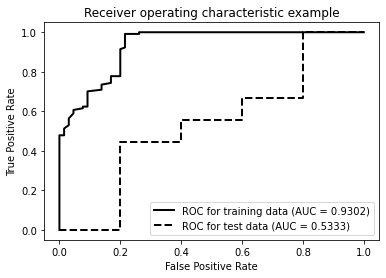

In [ ]:
# 課題1(d) 学習データおよびテストデータに対するROC曲線の描画とAUCを算出する
# ヒント： 関数roc_curve() と 関数roc_auc_score()もしくは関数auc()を使用
fpr_trn, tpr_trn, thresholds_trn = [YOUR CODE HERE]
roc_auc_trn = [YOUR CODE HERE]
plt.plot(fpr_trn, tpr_trn, label='ROC for training data (AUC = %0.4f)' % roc_auc_trn, lw=2, linestyle="-")

fpr_tst, tpr_tst, thresholds_tst = [YOUR CODE HERE]
roc_auc_tst = [YOUR CODE HERE]
plt.plot(fpr_tst, tpr_tst, label='ROC for test data (AUC = %0.4f)' % roc_auc_tst, lw=2, linestyle="--")

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()

## 課題2（発展）alphaの影響についてAUCとの関係のグラフを描画